# Implementing VGG16 model on Cifar10

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import shutil

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Resizing, Input

(train_X, train_y), (test_X, test_y) = cifar10.load_data()

In [17]:
classes = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']

In [3]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
def show_shapes(data_X, data_y, width=4, height=4):
  fig = plt.figure(figsize=(7 * (width / 2), 7 * (height / 2)))
  index = 0
  for x in range(width):
    for y in range(height):
      index += 1

      picked_index = random.randint(0, len(data_X))
      picked_img = data_X[picked_index]
      picked_label = data_y.reshape(data_y.shape[0])[picked_index]

      ax = fig.add_subplot(width, height, index)
      ax.set_xlabel(classes[picked_label])
      ax.imshow(picked_img)
  plt.tight_layout()
  plt.show()

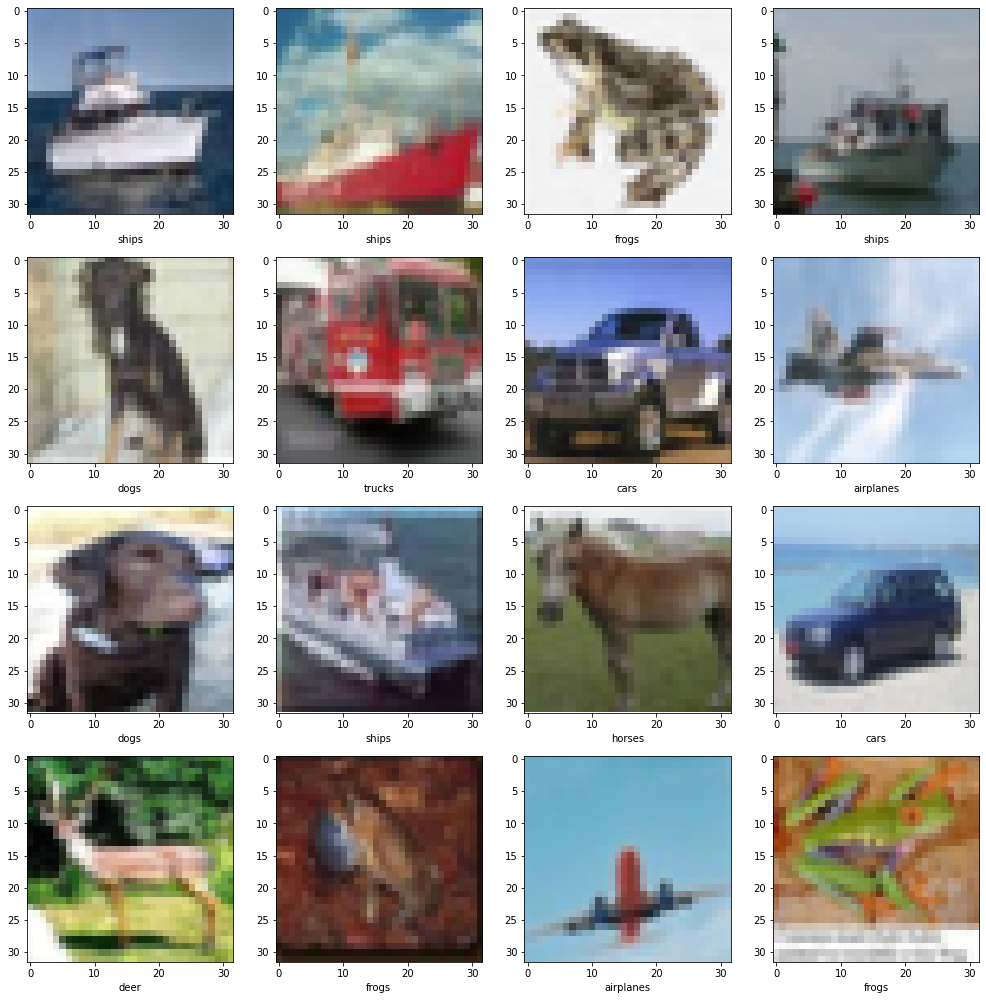

In [5]:
show_shapes(train_X, train_y)

In [6]:
print(train_X.min())
print(train_X.max())

0
255


In [7]:
train_X = train_X.astype('float32') / 255.
test_X = test_X.astype('float32') / 255.

### VGG Models

In [4]:
def build_vgg_block(input_layer, num_conv=3, channel=32, block_num=1):
  # Input Layer
  x = input_layer

  # Convolution Layer
  for conv_index in range(num_conv):
    x = Conv2D(filters=channel, 
               kernel_size=(3, 3), 
               activation='relu', 
               kernel_initializer='he_normal', 
               padding='same', 
               name=f'block{block_num}_conv{conv_index}')(x)
  # Max Pooling Layer
  x = MaxPooling2D(pool_size=(2, 2), strides=2, name=f'block{block_num}_pooling')(x)
  return x

In [25]:
def build_vgg(input_shape=(32, 32, 3), 
              num_conv_list=[2, 2, 3, 3, 3], 
              channel_list = [64, 128, 256, 512, 512],
              num_classes=10):
  assert len(num_conv_list) == len(channel_list)

  input_layer = keras.layers.Input(shape=input_shape)
  output = input_layer

  for i, (num_conv, channel) in enumerate(zip(num_conv_list, channel_list)):
    output = build_vgg_block(output, num_conv=num_conv, channel=channel, block_num=i)
  
  output = Flatten(name='flatten')(output)
  output = Dense(4096, activation='relu', name='fc1')(output)
  output = Dense(4096, activation='relu', name='fc2')(output)
  output = Dense(num_classes, activation='softmax', name='predictions')(output)

  return keras.Model(inputs=input_layer, outputs=output)

#### VGG16

In [39]:
vgg16 = build_vgg()
vgg16.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block0_conv0 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block0_conv1 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block0_pooling (MaxPooling2D (None, 16, 16, 64)        0         
_________________________________________________________________
block1_conv0 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block1_pooling (MaxPooling2D (None, 8, 8, 128)         0  

#### VGG11

In [27]:
vgg11 = build_vgg(num_conv_list=[1, 1, 2, 2, 2],
                  channel_list=[64, 128, 256, 512, 512])
vgg11.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block0_conv0 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block0_pooling (MaxPooling2D (None, 16, 16, 64)        0         
_________________________________________________________________
block1_conv0 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block1_pooling (MaxPooling2D (None, 8, 8, 128)         0         
_________________________________________________________________
block2_conv0 (Conv2D)        (None, 8, 8, 256)         295168    
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 8, 8, 256)         5900

#### VGG13

In [28]:
vgg13 = build_vgg(num_conv_list=[2, 2, 2, 2, 2],
                  channel_list=[64, 128, 256, 512, 512])
vgg13.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block0_conv0 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block0_conv1 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block0_pooling (MaxPooling2D (None, 16, 16, 64)        0         
_________________________________________________________________
block1_conv0 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block1_pooling (MaxPooling2D (None, 8, 8, 128)         0   

#### VGG19

In [29]:
vgg19 = build_vgg(num_conv_list=[2, 2, 4, 4, 4],
                  channel_list=[64, 128, 256, 512, 512])
vgg19.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block0_conv0 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block0_conv1 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block0_pooling (MaxPooling2D (None, 16, 16, 64)        0         
_________________________________________________________________
block1_conv0 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block1_pooling (MaxPooling2D (None, 8, 8, 128)         0   

### Train the models

In [40]:
BATCH_SIZE=256
EPOCH=50

In [43]:
# vgg16.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.),
vgg16.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Fit the model

In [44]:
model_dir = 'checkpoints/'
if os.path.exists(model_dir):
  shutil.rmtree(model_dir)
  
os.mkdir(model_dir)

filepath = '%s/{epoch:03d}-{val_accuracy:.4f}.hdf5' % (model_dir)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
             tf.keras.callbacks.ModelCheckpoint(filepath, save_best_only=True, verbose=1)]

probe_16 = vgg16.fit(train_X, train_y, epochs=EPOCH, batch_size=BATCH_SIZE, validation_split=0.2, shuffle=True, callbacks=callbacks)

Epoch 1/50
157/157 [==============================] - 11s 63ms/step - loss: 25.5706 - accuracy: 0.1322 - val_loss: 2.0105 - val_accuracy: 0.1918

Epoch 00001: val_loss improved from inf to 2.01047, saving model to checkpoints/001-0.1918.hdf5
Epoch 2/50
157/157 [==============================] - 10s 62ms/step - loss: 1.8256 - accuracy: 0.2738 - val_loss: 1.6865 - val_accuracy: 0.3375

Epoch 00002: val_loss improved from 2.01047 to 1.68649, saving model to checkpoints/002-0.3375.hdf5
Epoch 3/50
157/157 [==============================] - 10s 62ms/step - loss: 1.6007 - accuracy: 0.3812 - val_loss: 1.5762 - val_accuracy: 0.4113

Epoch 00003: val_loss improved from 1.68649 to 1.57616, saving model to checkpoints/003-0.4113.hdf5
Epoch 4/50
157/157 [==============================] - 10s 62ms/step - loss: 1.4049 - accuracy: 0.4798 - val_loss: 1.4231 - val_accuracy: 0.4853

Epoch 00004: val_loss improved from 1.57616 to 1.42306, saving model to checkpoints/004-0.4853.hdf5
Epoch 5/50
157/157 [===

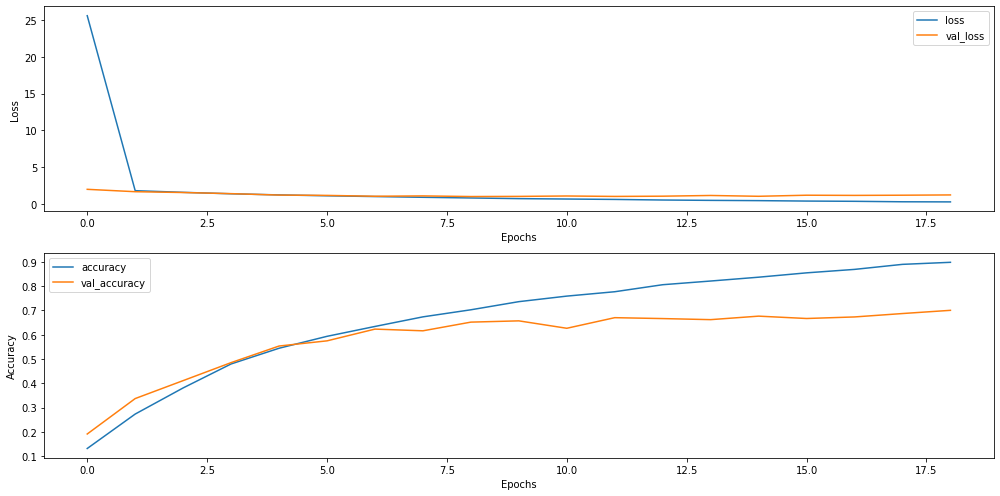

In [45]:
key_maps = {
    'Loss': ['loss', 'val_loss'],
    'Accuracy': ['accuracy', 'val_accuracy']
}
fig = plt.figure(figsize=(14, 7))
for index, key in enumerate(key_maps.keys()):
  ax = fig.add_subplot(len(key_maps), 1, index + 1)
  for probe_key in key_maps[key]:
    ax.plot(probe_16.history[probe_key], label=probe_key)
  ax.set_xlabel('Epochs')
  ax.set_ylabel(key)
  ax.legend(loc='best')
plt.tight_layout()
plt.show()

#### Evaluate the model using testing set

In [46]:
vgg16.evaluate(test_X, test_y)

313/313 [==============================] - 2s 7ms/step - loss: 1.2995 - accuracy: 0.6854


[1.2994974851608276, 0.6854000091552734]

#### Predict the model

In [47]:
def compare_predictions(model, data_X, data_y, width=2, height=4):
  predicted = model.predict(data_X)
  fig = plt.figure(figsize=(21, 14))
  index = 0
  for x in range(width):
    for y in range(height):

      picked_index = random.randint(0, len(data_X))
      picked_img = data_X[picked_index]
      predictions = predicted[picked_index]

      if np.argmax(predictions) == data_y[picked_index]:
        color = 'green'
      else:
        color = 'red'

      index += 1
      ax1 = fig.add_subplot(height, width * 2, index)
      ax1.imshow(picked_img)

      index += 1
      ax2 = fig.add_subplot(height, width * 2, index)
      ax2.bar(np.arange(0, 10), predictions, color=color)
      ax2.set_xticks(np.arange(0, 10))
      ax2.set_xticklabels(classes, rotation='45')
      
  plt.tight_layout()
  plt.show()

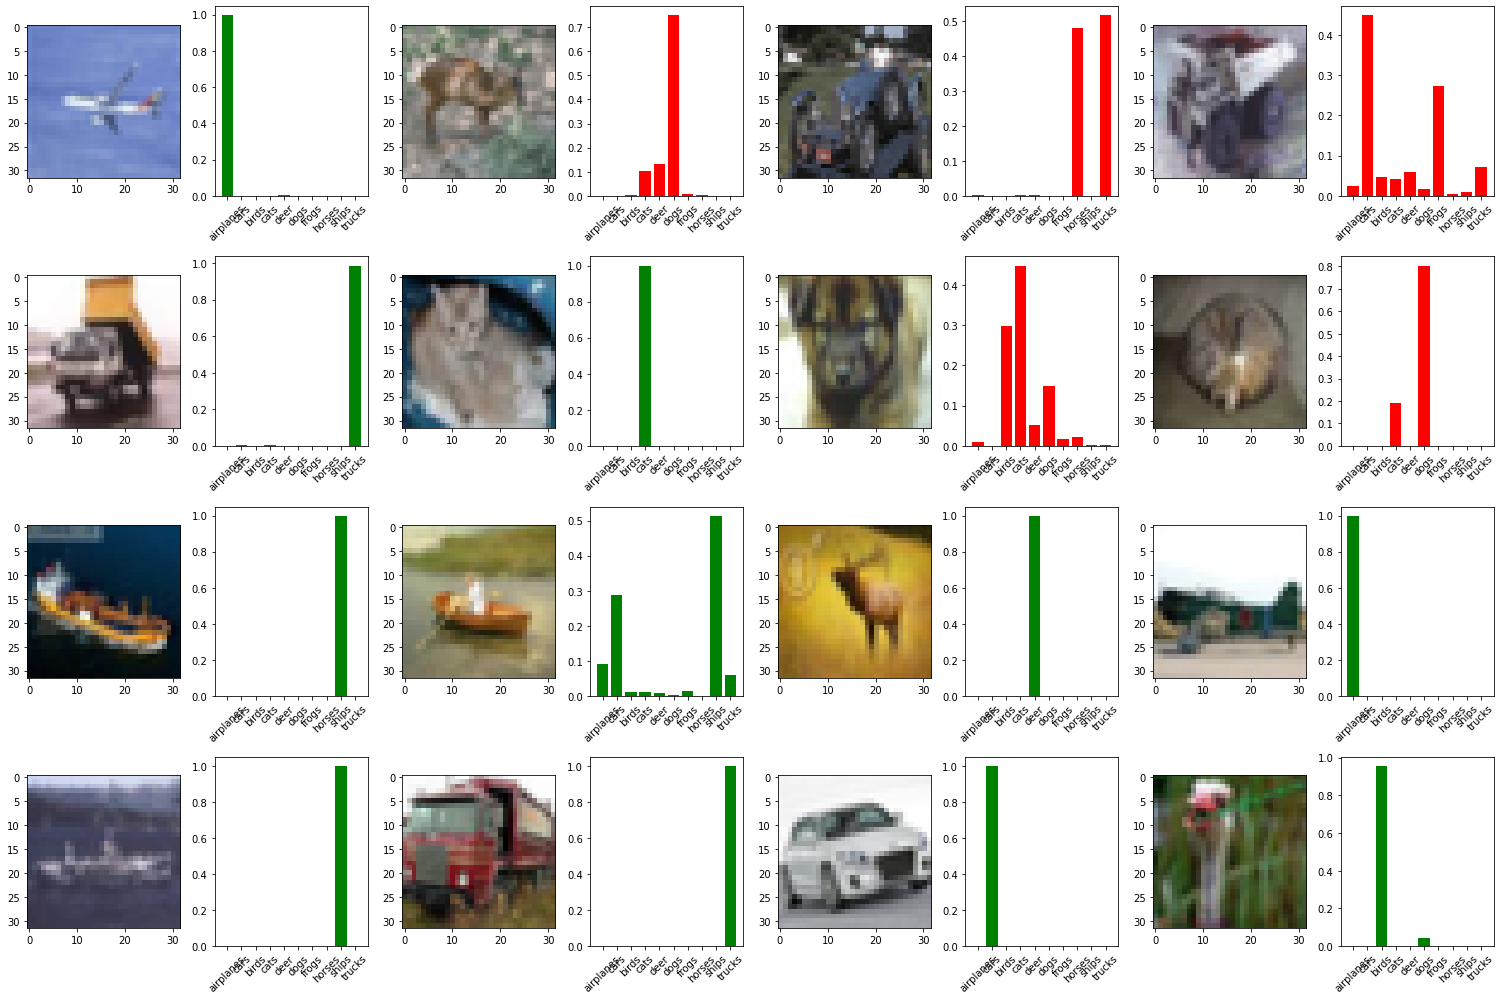

In [48]:
compare_predictions(vgg16, test_X, test_y, width=4, height=4)